In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math


In [6]:
#the start and end date
start_date = dt.datetime(2020,4,1)
end_date = dt.datetime(2023,4,1)

#loading from yahoo finance
data = yf.download("GOOGL",start_date, end_date)

# TO limit the display rows and columns in output
pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns',5)
print(data)


[*********************100%%**********************]  1 of 1 completed

                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2020-04-01   56.200001   56.471001  ...   55.105000  51970000
2020-04-02   55.000000   56.138500  ...   55.851501  56410000
...                ...         ...  ...         ...       ...
2023-03-30  100.910004  101.160004  ...  100.889999  33086200
2023-03-31  101.300003  103.889999  ...  103.730003  36863400

[756 rows x 6 columns]


In [4]:
# Setting 80 percent data for training and remainning 20 % for testing
training_data_len = math.ceil(len(data) * .8)
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1]
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)
print(train_data)


NameError: name 'data' is not defined

In [ ]:
# Selecting Open Price values
dataset_train = train_data.Open.values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape


(605, 1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])


[[0.01246754]
 [0.        ]
 [0.00764156]
 [0.01714287]
 [0.0607844 ]]


In [11]:
# Selecting Open Price values
dataset_test = test_data.Open.values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])


[0.98362881] [1.] [0.83867656] [0.84481572] [0.86118691]


In [13]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
	X_train.append(scaled_train[i-50:i, 0])
	y_train.append(scaled_train[i, 0])
	if i <= 51:
		print(X_train)
		print(y_train)
		print()


[array([0.01246754, 0.        , 0.00764156, 0.01714287, 0.0607844 ,
       0.05355843, 0.06139221, 0.05272728, 0.0727117 , 0.0761091 ,
       0.08682596, 0.0943896 , 0.08825454, 0.07413508, 0.0733039 ,
       0.08609869, 0.08051948, 0.09974024, 0.09516887, 0.12727273,
       0.12018702, 0.11641037, 0.1081195 , 0.12337662, 0.13402599,
       0.13574544, 0.14640004, 0.14378702, 0.16011432, 0.14345973,
       0.12130912, 0.12896625, 0.13588574, 0.14830132, 0.15021299,
       0.16155324, 0.15787013, 0.17764155, 0.16623377, 0.15584416,
       0.16645714, 0.16919484, 0.17402597, 0.178026  , 0.17495062,
       0.16396881, 0.16949613, 0.17934547, 0.18779741, 0.17715843])]
[0.16927791446834417]

[array([0.01246754, 0.        , 0.00764156, 0.01714287, 0.0607844 ,
       0.05355843, 0.06139221, 0.05272728, 0.0727117 , 0.0761091 ,
       0.08682596, 0.0943896 , 0.08825454, 0.07413508, 0.0733039 ,
       0.08609869, 0.08051948, 0.09974024, 0.09516887, 0.12727273,
       0.12018702, 0.11641037, 0.10

In [15]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
	X_test.append(scaled_test[i-50:i, 0])
	y_test.append(scaled_test[i, 0])


In [17]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)


X_train : (555, 50, 1) y_train : (555, 1)


In [19]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_test : (101, 50, 1) y_test : (101, 1)


In [21]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [35]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
								# decay=1e-6,
								momentum=0.5,
								nesterov=True),
				loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()


Epoch 1/20
278/278 [==============================] - 13s 37ms/step - loss: 0.0090
Epoch 2/20
278/278 [==============================] - 14s 50ms/step - loss: 0.0029
Epoch 3/20
278/278 [==============================] - 13s 45ms/step - loss: 0.0027
Epoch 4/20
278/278 [==============================] - 11s 41ms/step - loss: 0.0024
Epoch 5/20
278/278 [==============================] - 10s 37ms/step - loss: 0.0021
Epoch 6/20
278/278 [==============================] - 10s 35ms/step - loss: 0.0020
Epoch 7/20
278/278 [==============================] - 10s 35ms/step - loss: 0.0019
Epoch 8/20
278/278 [==============================] - 10s 37ms/step - loss: 0.0019
Epoch 9/20
278/278 [==============================] - 10s 37ms/step - loss: 0.0019
Epoch 10/20
278/278 [==============================] - 10s 37ms/step - loss: 0.0021
Epoch 11/20
278/278 [==============================] - 9s 34ms/step - loss: 0.0019
Epoch 12/20
278/278 [==============================] - 10s 36ms/step - loss: 0.0017
Ep

In [25]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
					return_sequences = True,
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train,
				y_train,
				batch_size = 1,
				epochs = 12)
regressorLSTM.summary()


Epoch 1/12
555/555 [==============================] - 17s 24ms/step - loss: 0.0054 - accuracy: 0.0018
Epoch 2/12
555/555 [==============================] - 14s 25ms/step - loss: 0.0027 - accuracy: 0.0018
Epoch 3/12
555/555 [==============================] - 16s 28ms/step - loss: 0.0023 - accuracy: 0.0018
Epoch 4/12
555/555 [==============================] - 13s 24ms/step - loss: 0.0016 - accuracy: 0.0018
Epoch 5/12
555/555 [==============================] - 13s 24ms/step - loss: 0.0016 - accuracy: 0.0018
Epoch 6/12
555/555 [==============================] - 13s 24ms/step - loss: 0.0014 - accuracy: 0.0018
Epoch 7/12
555/555 [==============================] - 13s 24ms/step - loss: 0.0010 - accuracy: 0.0018
Epoch 8/12
555/555 [==============================] - 13s 24ms/step - loss: 0.0011 - accuracy: 0.0018
Epoch 9/12
555/555 [==============================] - 13s 23ms/step - loss: 0.0011 - accuracy: 0.0018
Epoch 10/12
555/555 [==============================] - 13s 23ms/step - loss: 9.052

In [36]:
#Initialising the model
regressorGRU = Sequential()

# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50,
					return_sequences=True,
					input_shape=(X_train.shape[1],1),
					activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50,
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=50,
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=50,
					activation='tanh'))

# The output layer
regressorGRU.add(Dense(units=1,
					activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01,
								# decay=1e-7,
								momentum=0.9,
								nesterov=False),
					loss='mean_squared_error')

# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=1)
regressorGRU.summary()


Epoch 1/20
555/555 [==============================] - 31s 45ms/step - loss: 0.3658
Epoch 2/20
555/555 [==============================] - 28s 51ms/step - loss: 0.0032
Epoch 3/20
555/555 [==============================] - 28s 50ms/step - loss: 0.0034
Epoch 4/20
555/555 [==============================] - 25s 45ms/step - loss: 0.0028
Epoch 5/20
555/555 [==============================] - 25s 45ms/step - loss: 0.0029
Epoch 6/20
555/555 [==============================] - 25s 45ms/step - loss: 0.0026
Epoch 7/20
555/555 [==============================] - 25s 45ms/step - loss: 0.0026
Epoch 8/20
555/555 [==============================] - 28s 50ms/step - loss: 0.0027
Epoch 9/20
555/555 [==============================] - 27s 49ms/step - loss: 0.0022
Epoch 10/20
555/555 [==============================] - 25s 45ms/step - loss: 0.0023
Epoch 11/20
555/555 [==============================] - 25s 45ms/step - loss: 0.0021
Epoch 12/20
555/555 [==============================] - 25s 46ms/step - loss: 0.0020
E

In [38]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)

4/4 [==============================] - 2s 23ms/step


In [39]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN)
y_LSTM_O = scaler.inverse_transform(y_LSTM)
y_GRU_O = scaler.inverse_transform(y_GRU)

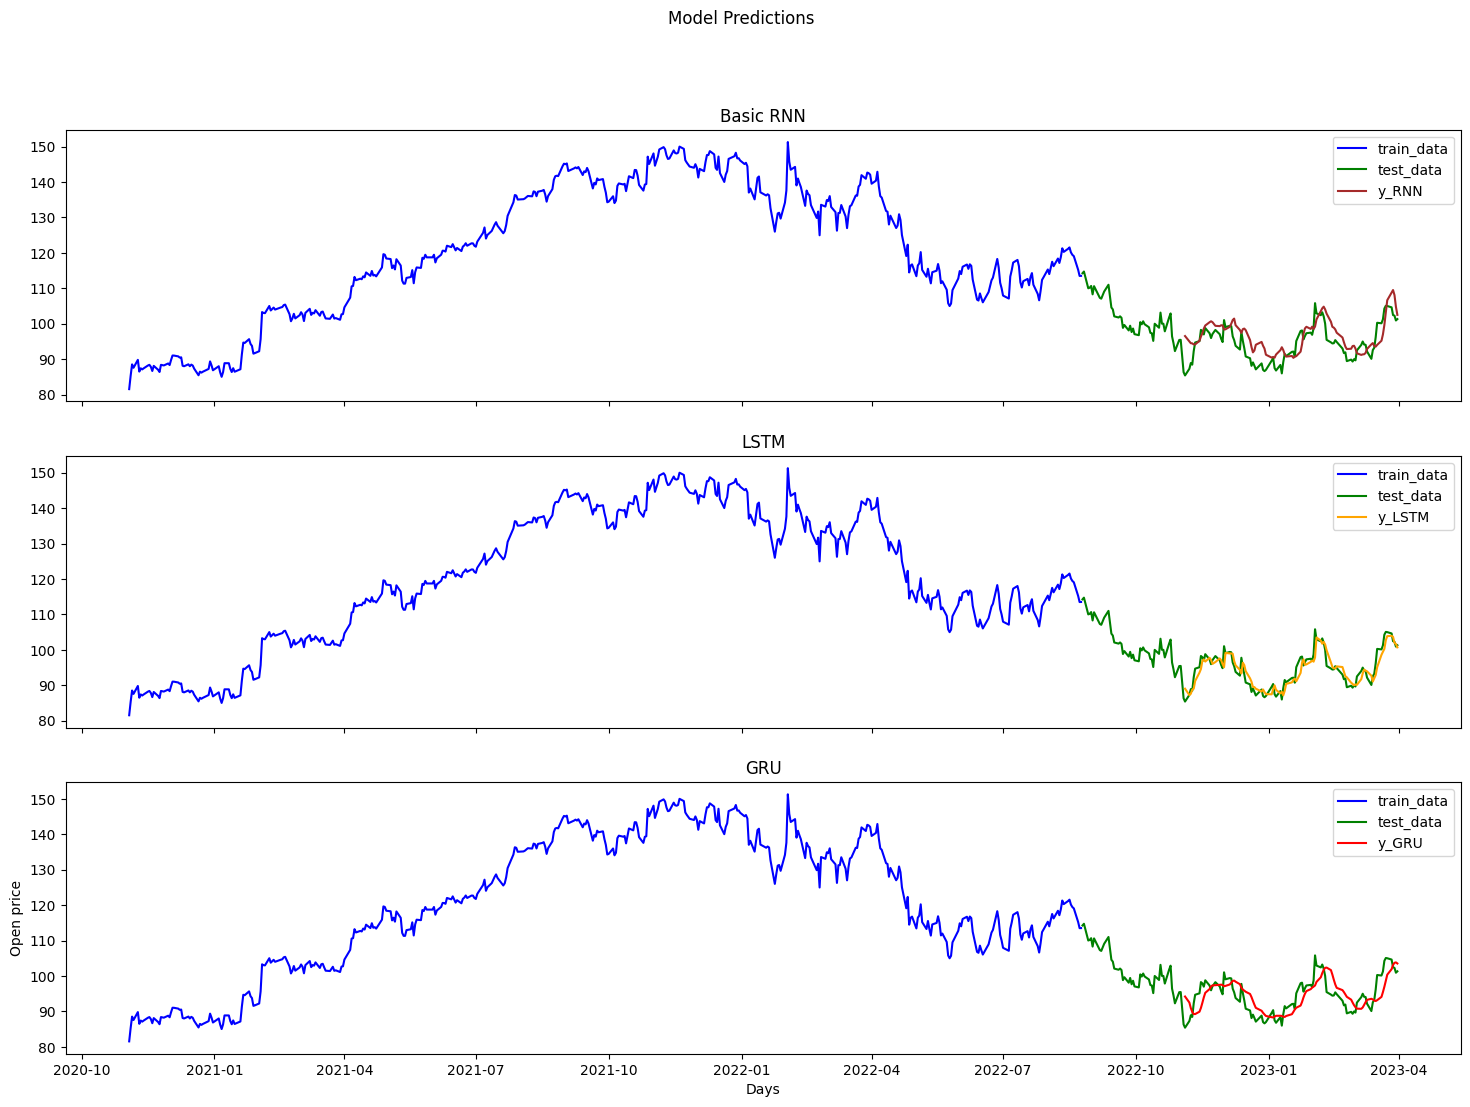

In [42]:
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

#Plot for GRU predictions
axs[2].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_GRU_O, label = "y_GRU", color = "red")
axs[2].legend()
axs[2].title.set_text("GRU")

plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()
